In [96]:
from fugue_notebook import setup
import pandas as pd
import seaborn as sns
from typing import List, Any, Dict, Tuple, Iterable
import matplotlib.pyplot as plt
setup()

<IPython.core.display.Javascript object>

In [97]:
%%fsql 
df_taxi = LOAD "taxi_trips.csv" (header = true , infer_schema=true)
YIELD DATAFRAME AS df_taxi
# KHI NÀO CHẠY LẠI THÌ LOAD LẠI 

In [89]:
%%fsql
SELECT * FROM df_taxi
PRINT

,unique_key:str,trip_start_timestamp:str,trip_total:double,trip_miles:double,trip_seconds:double,company:str
0,4341c6b64df74872ac59c2c707864a73352465b1,2022-10-31 17:00:00+00:00,74.18,15.65,1238.0,Chicago Taxicab
1,7995076524f11923dfc276caa315c6c82ebacfd2,2022-04-24 12:00:00+00:00,48.50,17.63,2076.0,Koam Taxi Association
2,7c62e98accacffceb53db4aa051c95b3716f7f47,2022-04-27 11:15:00+00:00,33.75,7.73,2934.0,Patriot Taxi Dba Peace Taxi Associat
3,7a56b72cb5bb2d8e2fd2e3cb0d5da87e97a9b710,2022-04-28 18:45:00+00:00,12.25,2.20,780.0,312 Medallion Management Corp
4,7ba89eaed4ca3ba06d45c3e8f153daedc5b8a628,2022-04-01 01:30:00+00:00,47.10,13.70,1057.0,Setare Inc
5,7a25d0392e1113720553397fcf24e3cb7907a80f,2022-04-08 15:15:00+00:00,8.75,0.92,340.0,Patriot Taxi Dba Peace Taxi Associat
6,7dceda7a64f1a1d87a243041727e7337caca3a79,2022-04-11 19:00:00+00:00,5.50,0.60,360.0,KOAM Taxi Association
7,7bd35167e85d34ae41e4e1131eddb4a6eaf3022d,2022-04-11 12:15:00+00:00,62.96,20.90,1801.0,Chicago Taxicab
8,7b027d625ee14cb2433805c6102c80aafa6db38e,2022-04-16 13:00:00+00:00,31.00,0.00,0.0,KOAM Taxi Association
9,7bb55d38f5c94e5735ad2a884ab6e86817585c83,2022-04-02 10:45:00+00:00,51.70,16.10,2160.0,KOAM Taxi Association


In [90]:
%%fsql
SELECT  COUNT(DISTINCT company) AS total_comp, COUNT(*) AS rows FROM df_taxi
PRINT



,total_comp:long,rows:long
0,37,6382071


In [91]:
%%fsql
SELECT company FROM df_taxi
SAVE OVERWRITE "company.csv"
PRINT

,company:str
0,Chicago Taxicab
1,Koam Taxi Association
2,Patriot Taxi Dba Peace Taxi Associat
3,312 Medallion Management Corp
4,Setare Inc
5,Patriot Taxi Dba Peace Taxi Associat
6,KOAM Taxi Association
7,Chicago Taxicab
8,KOAM Taxi Association
9,KOAM Taxi Association


In [92]:
%%fsql
test = SELECT company, SUM(trip_total) AS total FROM df_taxi
GROUP BY company
ORDER BY total DESC
LIMIT 10
YIELD DATAFRAME AS test
PRINT
#kiem tra
# SELECT COUNT(*) FROM test
# PRINT
SELECT * FROM test
SAVE OVERWRITE "top_10_total_2022.csv"

,company:str,total:double
18,Flash Cab,34972753.19
31,Taxi Affiliation Services,34168433.89
30,Sun Taxi,19776999.91
17,City Service,15984869.90
14,Chicago Independents,9273834.55
33,"Taxicab Insurance Agency, LLC",7822189.69
32,Taxicab Insurance Agency Llc,7587309.51
23,Medallion Leasin,7129201.67
19,Globe Taxi,6386732.44
8,5 Star Taxi,4458205.35


In [93]:
def bar_plot(df: pd.DataFrame) -> None:
    plt.figure(figsize=(10,6))
    sns.barplot(data=df, x='total', y='company')
    plt.show()


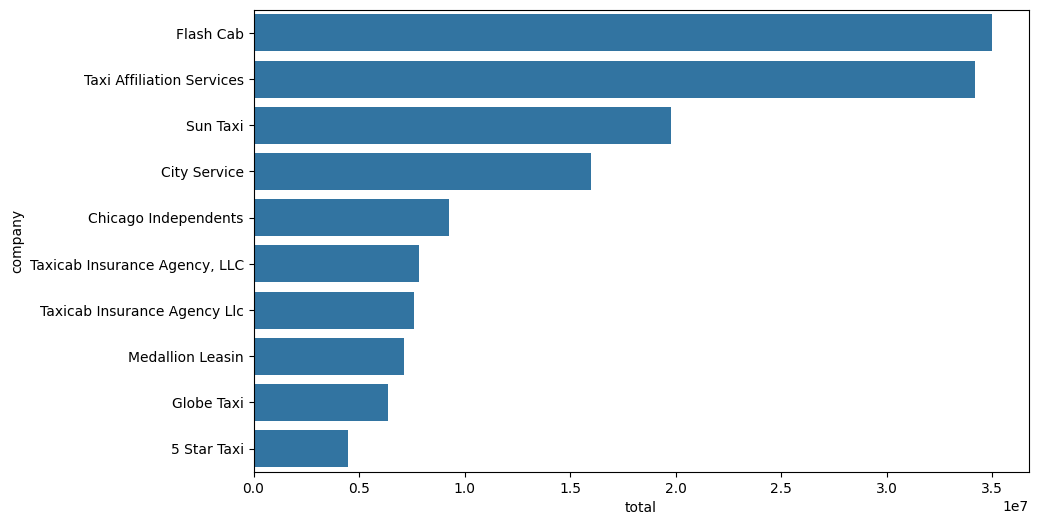

In [94]:
%%fsql 
SELECT * FROM test
OUTPUT USING bar_plot